In [1]:
import os
#This line imports the os module, 
#which provides a way to interact with the operating system.
#These lines import the necessary libraries for data manipulation 
#(numpy, pandas), data visualization (matplotlib, seaborn), and other functions.
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#variable scaling libraries
from sklearn.preprocessing import StandardScaler

#variables normalisation
from scipy.stats import boxcox

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#import hyperparameter tuning library
from sklearn.model_selection import GridSearchCV
#These lines import specific functions or classes 
#from scikit-learn (sklearn) library, which is commonly used 
#for machine learning tasks. It includes preprocessing, model selection, 

#evaluation metrics, and hyperparameter tuning modules.
#other libraries
import math
from collections import Counter
#These lines import additional modules math and Counter 
#which might be used later in the code for specific operations.

In [2]:
data = pd.read_csv("riceClassification.csv")
#This line reads the data from a CSV file named "riceClassification.csv" into
# a Pandas DataFrame named data.

In [3]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [4]:
data.shape

(18185, 12)

In [5]:
data.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [6]:
data.nunique(axis=0)

id                 18185
Area                5343
MajorAxisLength    18185
MinorAxisLength    18185
Eccentricity       18185
ConvexArea          5450
EquivDiameter       5343
Extent             18007
Perimeter          16246
Roundness          18184
AspectRation       18185
Class                  2
dtype: int64

In [7]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
#This line of code generates descriptive statistics of your dataset and formats the values to display as floats:

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [8]:
#check, whether there are duplicate rows
print("From all {all} rows, {num} of them are unique.".format(all = len(data),num = len(data.id.unique())))

From all 18185 rows, 18185 of them are unique.


In [9]:
#datatypes of all present attributes in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [10]:
data = data.drop(columns = 'id', axis = 1)
#This line drops the 'id' column from the DataFrame 
#data along the columns axis (axis=1).

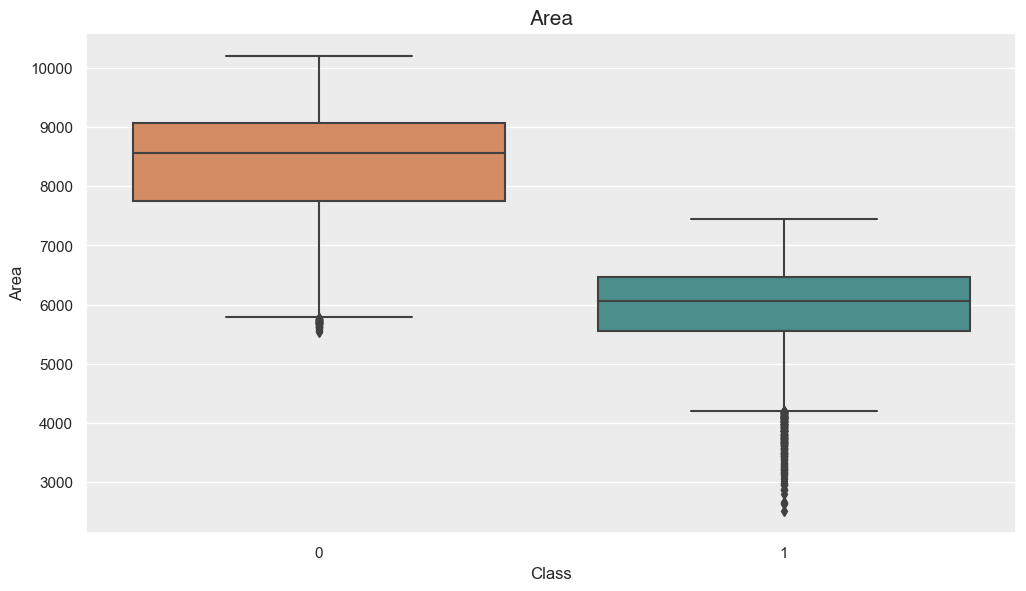

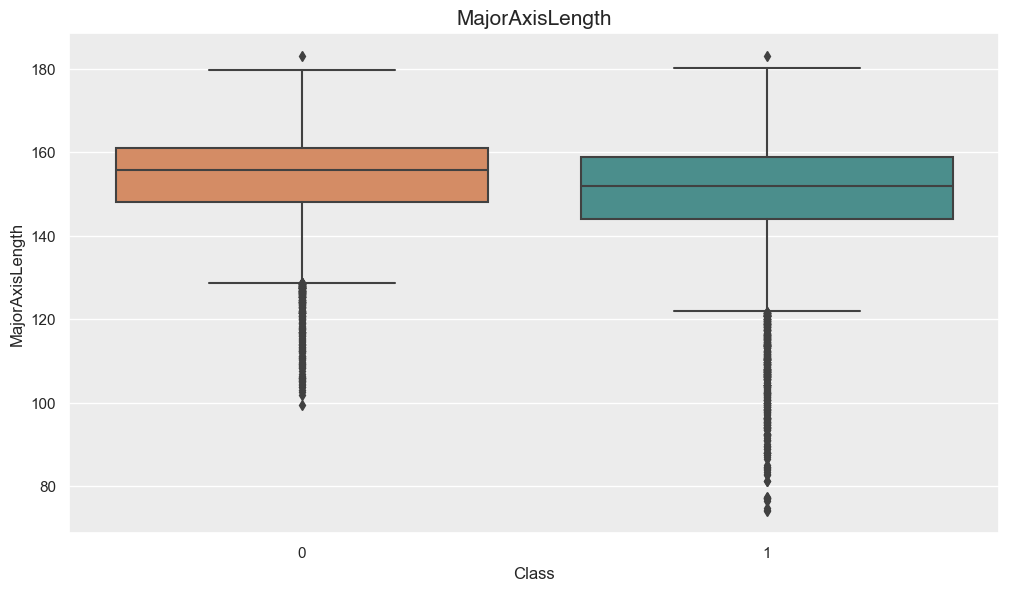

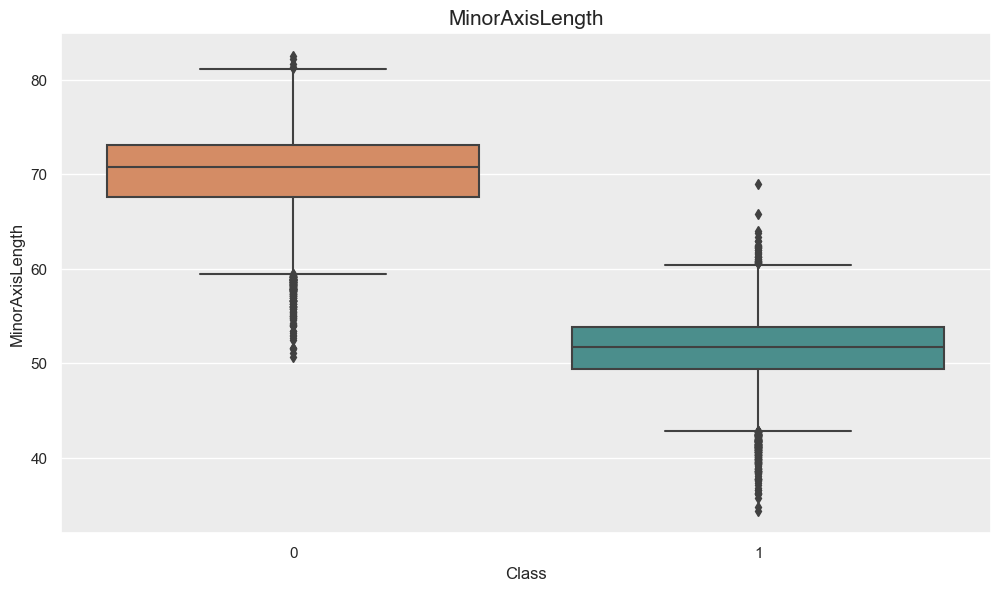

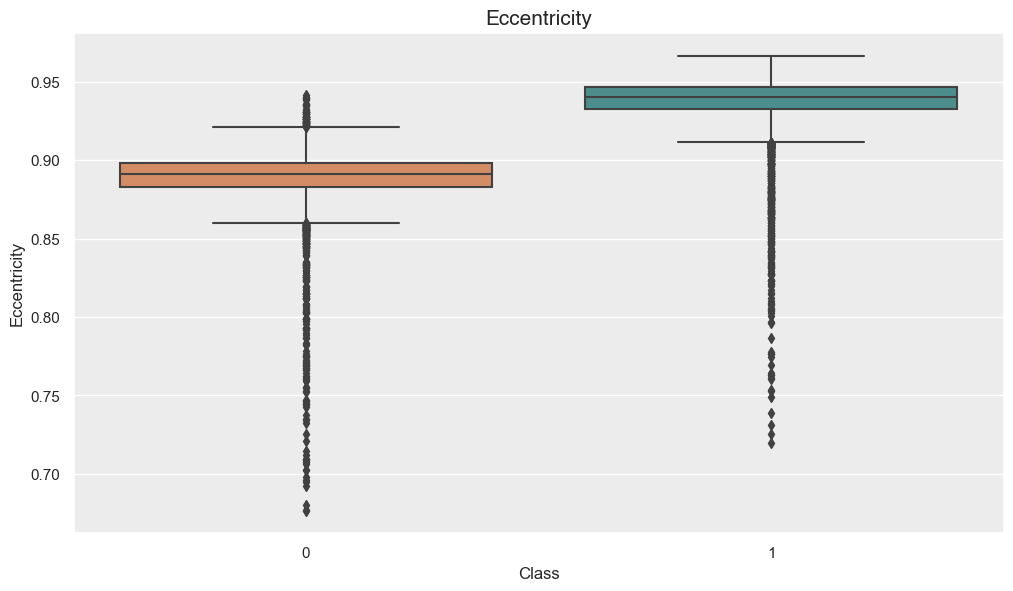

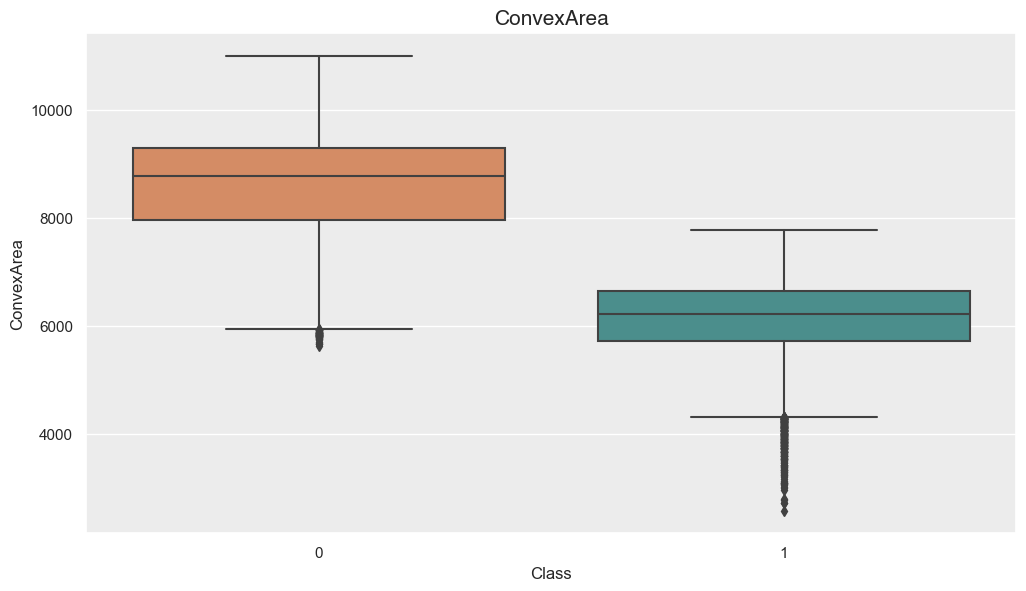

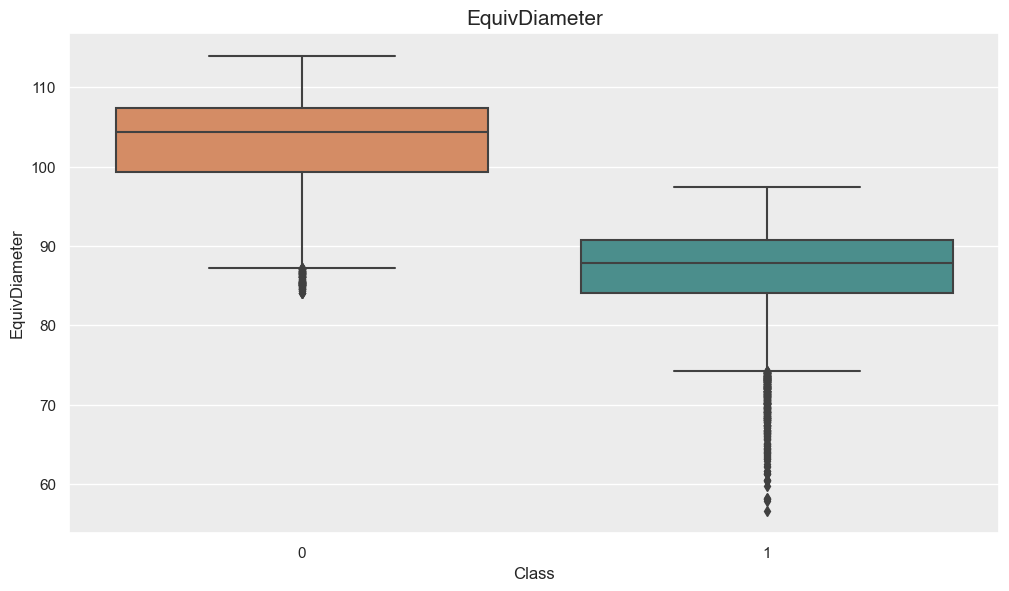

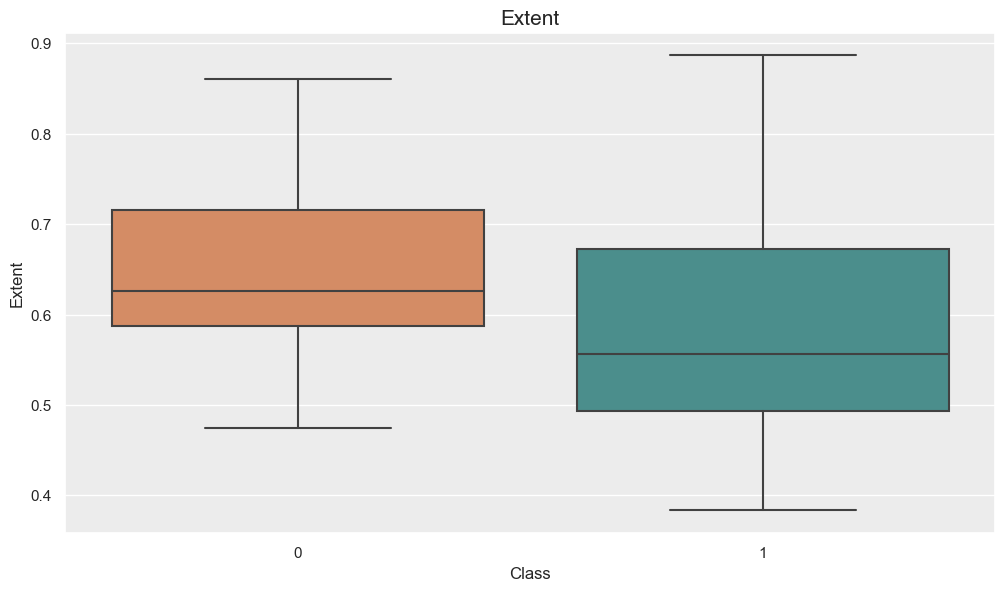

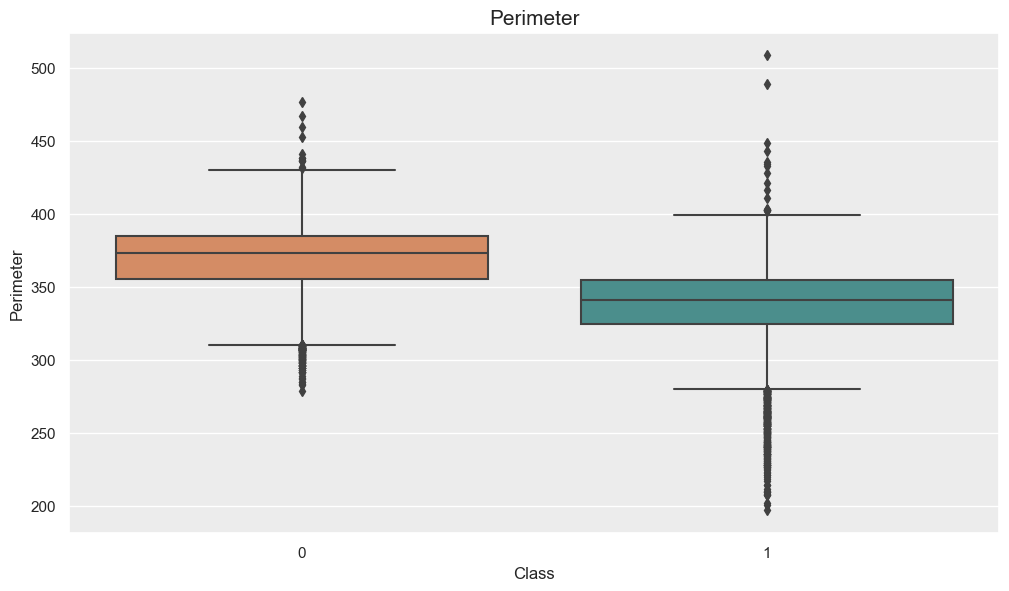

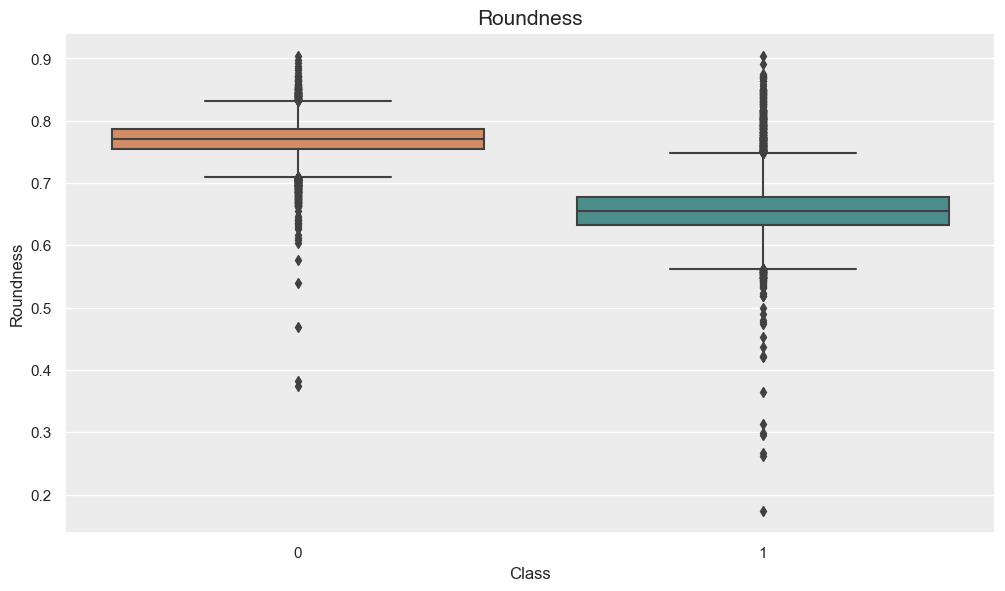

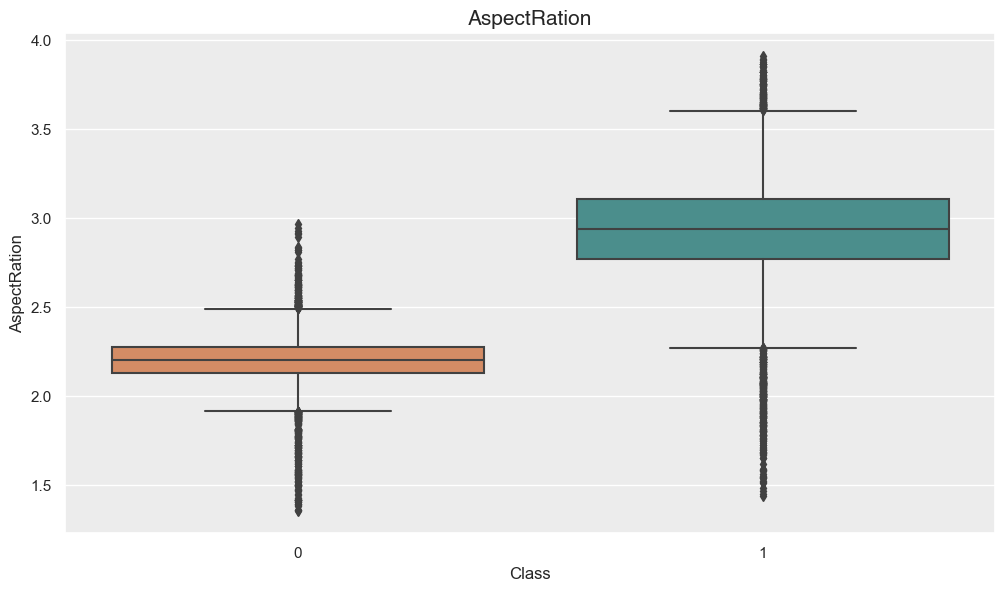

In [11]:

#These lines create boxplots for each numerical feature,
# showing their distribution across different classes ('Class').
list_of_num_features = data.loc[:, data.columns != 'Class']
palette_features = ['#E68753', '#409996']
#These lines create a list of numerical features 
#(excluding the 'Class' column) and define a color palette for plotting.

sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_num_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.boxplot(x = data['Class'], y = list_of_num_features[feature], data = data, palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()
    
#These lines create boxplots for each numerical feature,
# showing their distribution across different classes ('Class').    

In [12]:
#normalization of all attributes with outliers
columns = data.columns
columns = [c for c in columns if c not in ['Extent', 'Class']]

for col in columns:
    data[col] = boxcox(x=data[col])[0]
    
#These lines define feature columns (X) and the target variable (y) 
#for machine learning model training.    

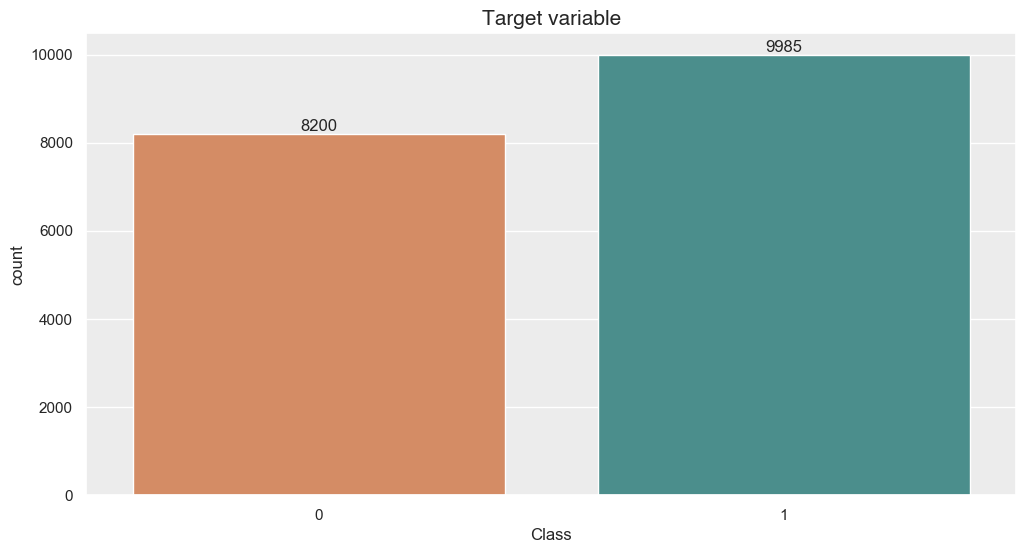

In [13]:
#plot target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=data['Class'], data=data, palette=palette_features)

#add labels to each bar
abs_values = data['Class'].value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

#show the plot
plt.show()

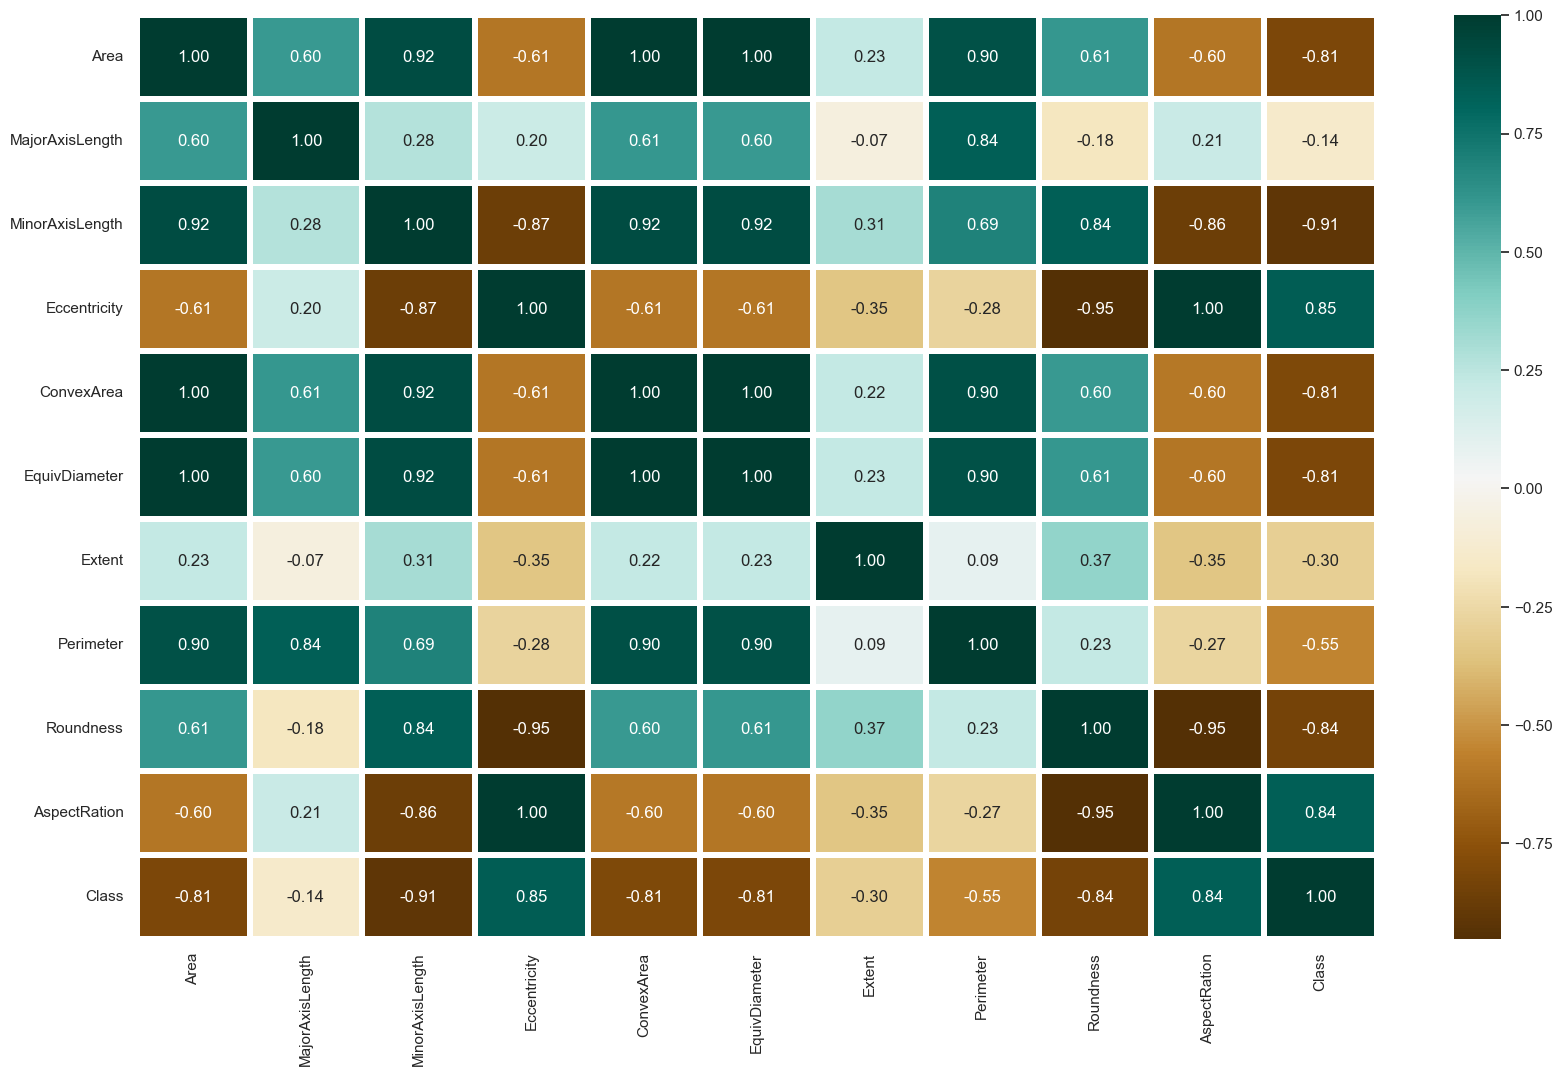

In [14]:
corr = data.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()


The heatmap is used to visually represent the correlation matrix between different numerical features in your dataset. Each cell in the heatmap represents the correlation coefficient between two features. The heatmap provides a quick and intuitive way to identify patterns of correlation and relationships between features.

Here's why this visualization is useful:

1. **Identifying Correlated Features**: It helps in identifying pairs of features that are highly correlated with each other. High correlation between features may indicate redundancy and can lead to multicollinearity issues in some machine learning algorithms.

2. **Feature Selection**: By visualizing the correlations, you can identify which features are highly correlated with the target variable. This information can guide feature selection or dimensionality reduction efforts to improve model performance or reduce computational complexity.

3. **Understanding Relationships**: It provides insights into the relationships between different features. For example, positive correlation between two features indicates that they tend to increase or decrease together, while negative correlation indicates an inverse relationship.

4. **Diagnostic Tool**: It serves as a diagnostic tool to identify potential issues such as spurious correlations or data quality problems. For example, unexpected correlations may prompt further investigation into the data collection process or feature engineering steps.

Overall, the heatmap is a powerful tool for exploratory data analysis and can help in making informed decisions during the data preprocessing and feature engineering stages of a machine learning project.

In [15]:
columns = data.columns
columns = [c for c in columns if c not in ['Class']]
y = data['Class'] 
X = data[columns]

In [16]:
#preparation of train and test data for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1) #90 % of train data, 10 % of test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#This line splits the data into training and testing sets 
#(90% training, 10% testing) while maintaining class proportions 
#using stratified sampling.

((16366, 10), (1819, 10), (16366,), (1819,))

[[  0 820]
 [  0 999]]


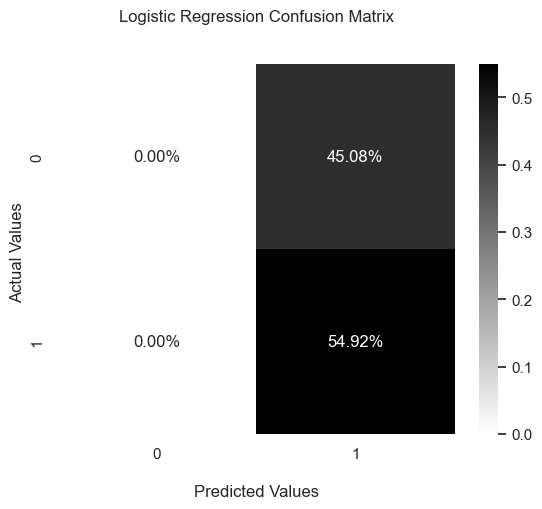

In [17]:
#implementing Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
#These lines create a Logistic Regression model, train it on 
#the training data (X_train, y_train), and make predictions 
#on the test data (X_test).

#plotting Confusion Matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(cf_matrix_lr)

#This line calculates the confusion matrix 
#based on the actual and predicted values.

ax = sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Logistic Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [18]:
#evaluation of Logistic Regression: metrics pivot chart
print(classification_report(y_test, y_pred_lr))

#This line prints a classification report, including 
#precision, recall, F1-score, and support for each class.

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_lr),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_lr),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_lr),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_lr),3)))

#These lines print individual evaluation metrics -
# accuracy score, precision score, recall score, and F1-score.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       820
           1       0.55      1.00      0.71       999

    accuracy                           0.55      1819
   macro avg       0.27      0.50      0.35      1819
weighted avg       0.30      0.55      0.39      1819

Accuracy Score : 0.549
Precision Score : 0.549
Recall Score : 1.0
F-Score : 0.709


/Users/khawarahemadkhan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khawarahemadkhan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khawarahemadkhan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Most suitable parameters for Logistic Regression: {'C': 20, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

[[647 173]
 [436 563]]


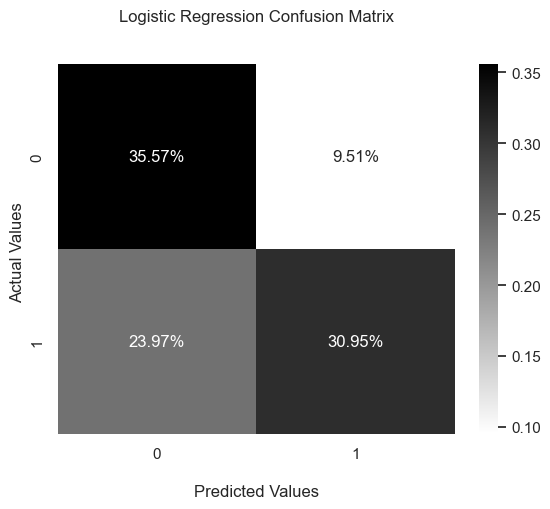

In [19]:
#hyperparameter tuning of Logistic Regression (parameters must be of data type list)
params = [{'penalty' : ['l2'], 'solver': ['lbfgs', 'liblinear'],
    'max_iter' : [1000, 5000, 10000], 'C': [20, 5,1,0.1,0.5]}]
#This line defines a list of dictionaries params, specifying 
#hyperparameters for hyperparameter tuning.

lr_before_tuning = LogisticRegression()
lr_model_tuning = GridSearchCV(lr_before_tuning, param_grid = params, verbose=True, n_jobs=-1)
grid_lr_metrics = lr_model_tuning.fit(X_train, y_train)

#These lines perform hyperparameter tuning for Logistic
# Regression using GridSearchCV with specified hyperparameters and fit it to the training data

#Predict values based on new parameters
y_lrc_pred_metrics = grid_lr_metrics.predict(X_test)
#This line makes predictions on the test data
# using the tuned Logistic Regression model.

lr_tuned_accuracy = accuracy_score(y_test,y_lrc_pred_metrics)
lr_tuned_precision = precision_score(y_test,y_lrc_pred_metrics)
lr_tuned_recall = recall_score(y_test,y_lrc_pred_metrics)
lr_tuned_f1_score = f1_score(y_test,y_lrc_pred_metrics)

# the best parameters of Logistic Regression
print('Most suitable parameters for Logistic Regression: ' + str(grid_lr_metrics.best_params_) + '\n')
#This line prints the best hyperparameters 
#found by the hyperparameter tuning process.

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test, y_lrc_pred_metrics)
#This line calculates the confusion matrix based
# on the actual and predicted values of the tuned model.

#plotting Confusion Matrix
cf_matrix_lr = confusion_matrix(y_test, y_lrc_pred_metrics)
print(cf_matrix_lr)

ax = sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%', cmap='binary')
ax.set_title('Logistic Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [20]:
#evaluation of tuned Logistic Regression: metrics pivot chart
print(classification_report(y_test, y_lrc_pred_metrics))
#This line prints a classification report for the tuned Logistic Regression model.

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_lrc_pred_metrics),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_lrc_pred_metrics),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_lrc_pred_metrics),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_lrc_pred_metrics),3)))

#These lines print individual evaluation 
#metrics for the tuned Logistic Regression model.

              precision    recall  f1-score   support

           0       0.60      0.79      0.68       820
           1       0.76      0.56      0.65       999

    accuracy                           0.67      1819
   macro avg       0.68      0.68      0.66      1819
weighted avg       0.69      0.67      0.66      1819

Accuracy Score : 0.665
Precision Score : 0.765
Recall Score : 0.564
F-Score : 0.649
